# ERMES heat source
ChatGPT description:

The boundary condition you've outlined here is a Neumann boundary condition, which involves specifying a heat source term (SOURCE) that varies across different material groups in your simulation. This type of boundary condition defines the rate of heat added or removed per unit volume, rather than specifying the temperature directly.

The boundary condition you described does indeed represent volumetric heating. In this context, it's a type of Neumann boundary condition where heat is added or removed from within the volume of the material, rather than through its surface.

This method is often used to simulate the internal generation of heat within a material, such as from electromagnetic energy (in the case of Joule heating, as you might be implying with ERMES results), chemical reactions, or decay of radioactive materials. The heat generation per unit volume can vary across different regions or materials, which seems to be the case in your setup where each material group receives a specific heat input from the ERMES results.

Volumetric heating is crucial for accurately modeling scenarios where internal heat sources significantly affect the temperature distribution and the resulting physical behaviors of materials, such as in electronic components, reactors, or other thermally stressed components.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
# # Load your NumPy array
# ERMES = np.load('../Loads/EM_loads.npy') # original EM load with radiation.
# ERMES.shape

In [22]:
# plt.hist(ERMES.flatten(), bins=100)
# plt.show()

In [23]:
df = pd.read_csv('../Loads/Load_CSV/EM_load.csv') # EM load for pure heat conduction
df.keys()

Index(['Joule_heating', 'Points_0', 'Points_1', 'Points_2'], dtype='object')

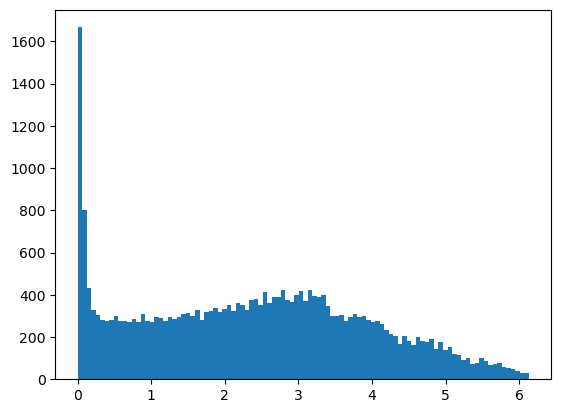

In [24]:
plt.hist(df['Joule_heating'], bins=100)
plt.show()

# Coolant Robin BC
ChatGPT description:

The boundary condition described in your code snippet applies a heat transfer coefficient (HTC) to simulate cooling due to a coolant, with data for the HTC being loaded from a file. This type of boundary condition can be categorized based on how the heat flux is defined in relation to temperature differences between the material surface and the environment (or coolant in this case).

The key to identifying whether a boundary condition is of Neumann or Robin type lies in how the heat flux ($q$) is defined:

* Neumann boundary condition specifies a fixed heat flux across the boundary. In thermal problems, this would directly set the heat flux without explicitly considering the temperature difference between the surface and the surrounding environment. It's defined as $q$ =constant or a prescribed function of position or time.

* Robin boundary condition (also known as a convective or mixed boundary condition) relates the heat flux to the temperature difference between the surface and the ambient environment. It's commonly used to model convective heat transfer and is defined as $q=h(Ts −T_{\infty})$, where $h$ is the heat transfer coefficient, $Ts$ is the surface temperature, and $T_{\infty}$ is the ambient temperature.

Given the description of your code, where the heat transfer coefficient (HTC) data is applied to simulate cooling, and the heat flux is adjusted based on this data, this suggests a Robin boundary condition. The HTC values are used to calculate the heat flux based on the temperature difference between the pipe surface (or the material boundary in general) and the coolant. The modification of HTdata to change flux values to negative indicates that energy is being removed from the sample, consistent with cooling.

Thus, the cooling due to the coolant, represented by applying HTC data to a surface, would be classified as a Robin boundary condition in the context of thermal analysis.

# A heat transfer coefficient is not used directly.
That’s correct! In the scenario you've set up, the heat transfer coefficient (HTC) isn't explicitly defined as a separate variable or function. Instead, the relationship between temperature and heat flux, likely incorporating the HTC, is predefined in the data you load from the file (HTdata). This data is then used to define a function (PipeFlux) that dictates how the heat flux varies with temperature, effectively embedding the HTC within this relationship.

This method allows the simulation to directly use temperature-dependent heat flux values, where each temperature value corresponds to a specific flux, thus avoiding the need to separately calculate flux based on an explicit HTC value at each simulation step. It simplifies the boundary condition application by directly relating temperature to heat flux through the data provided.

In [26]:
HTdata = np.fromfile("../Loads/HeatTransfer.dat",dtype=float,count=-1,sep=" ")
HTdata.shape

(464,)

In [27]:
# Change flux to negative for energy to leave sample
HTdata[1::2] = -HTdata[1::2]